Data Discovery

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify

from pywaffle import Waffle

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures,StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from sklearn.datasets import make_classification


import warnings
warnings.filterwarnings('ignore')

data_csv = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

data = pd.DataFrame(data_csv)

data.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [22]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Data Qualtiy

In [23]:
data.duplicated().sum()

np.int64(0)

In [24]:
data['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [25]:
data['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [26]:
data = data.drop(['StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1)

In [27]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Data Cleaning & EDA

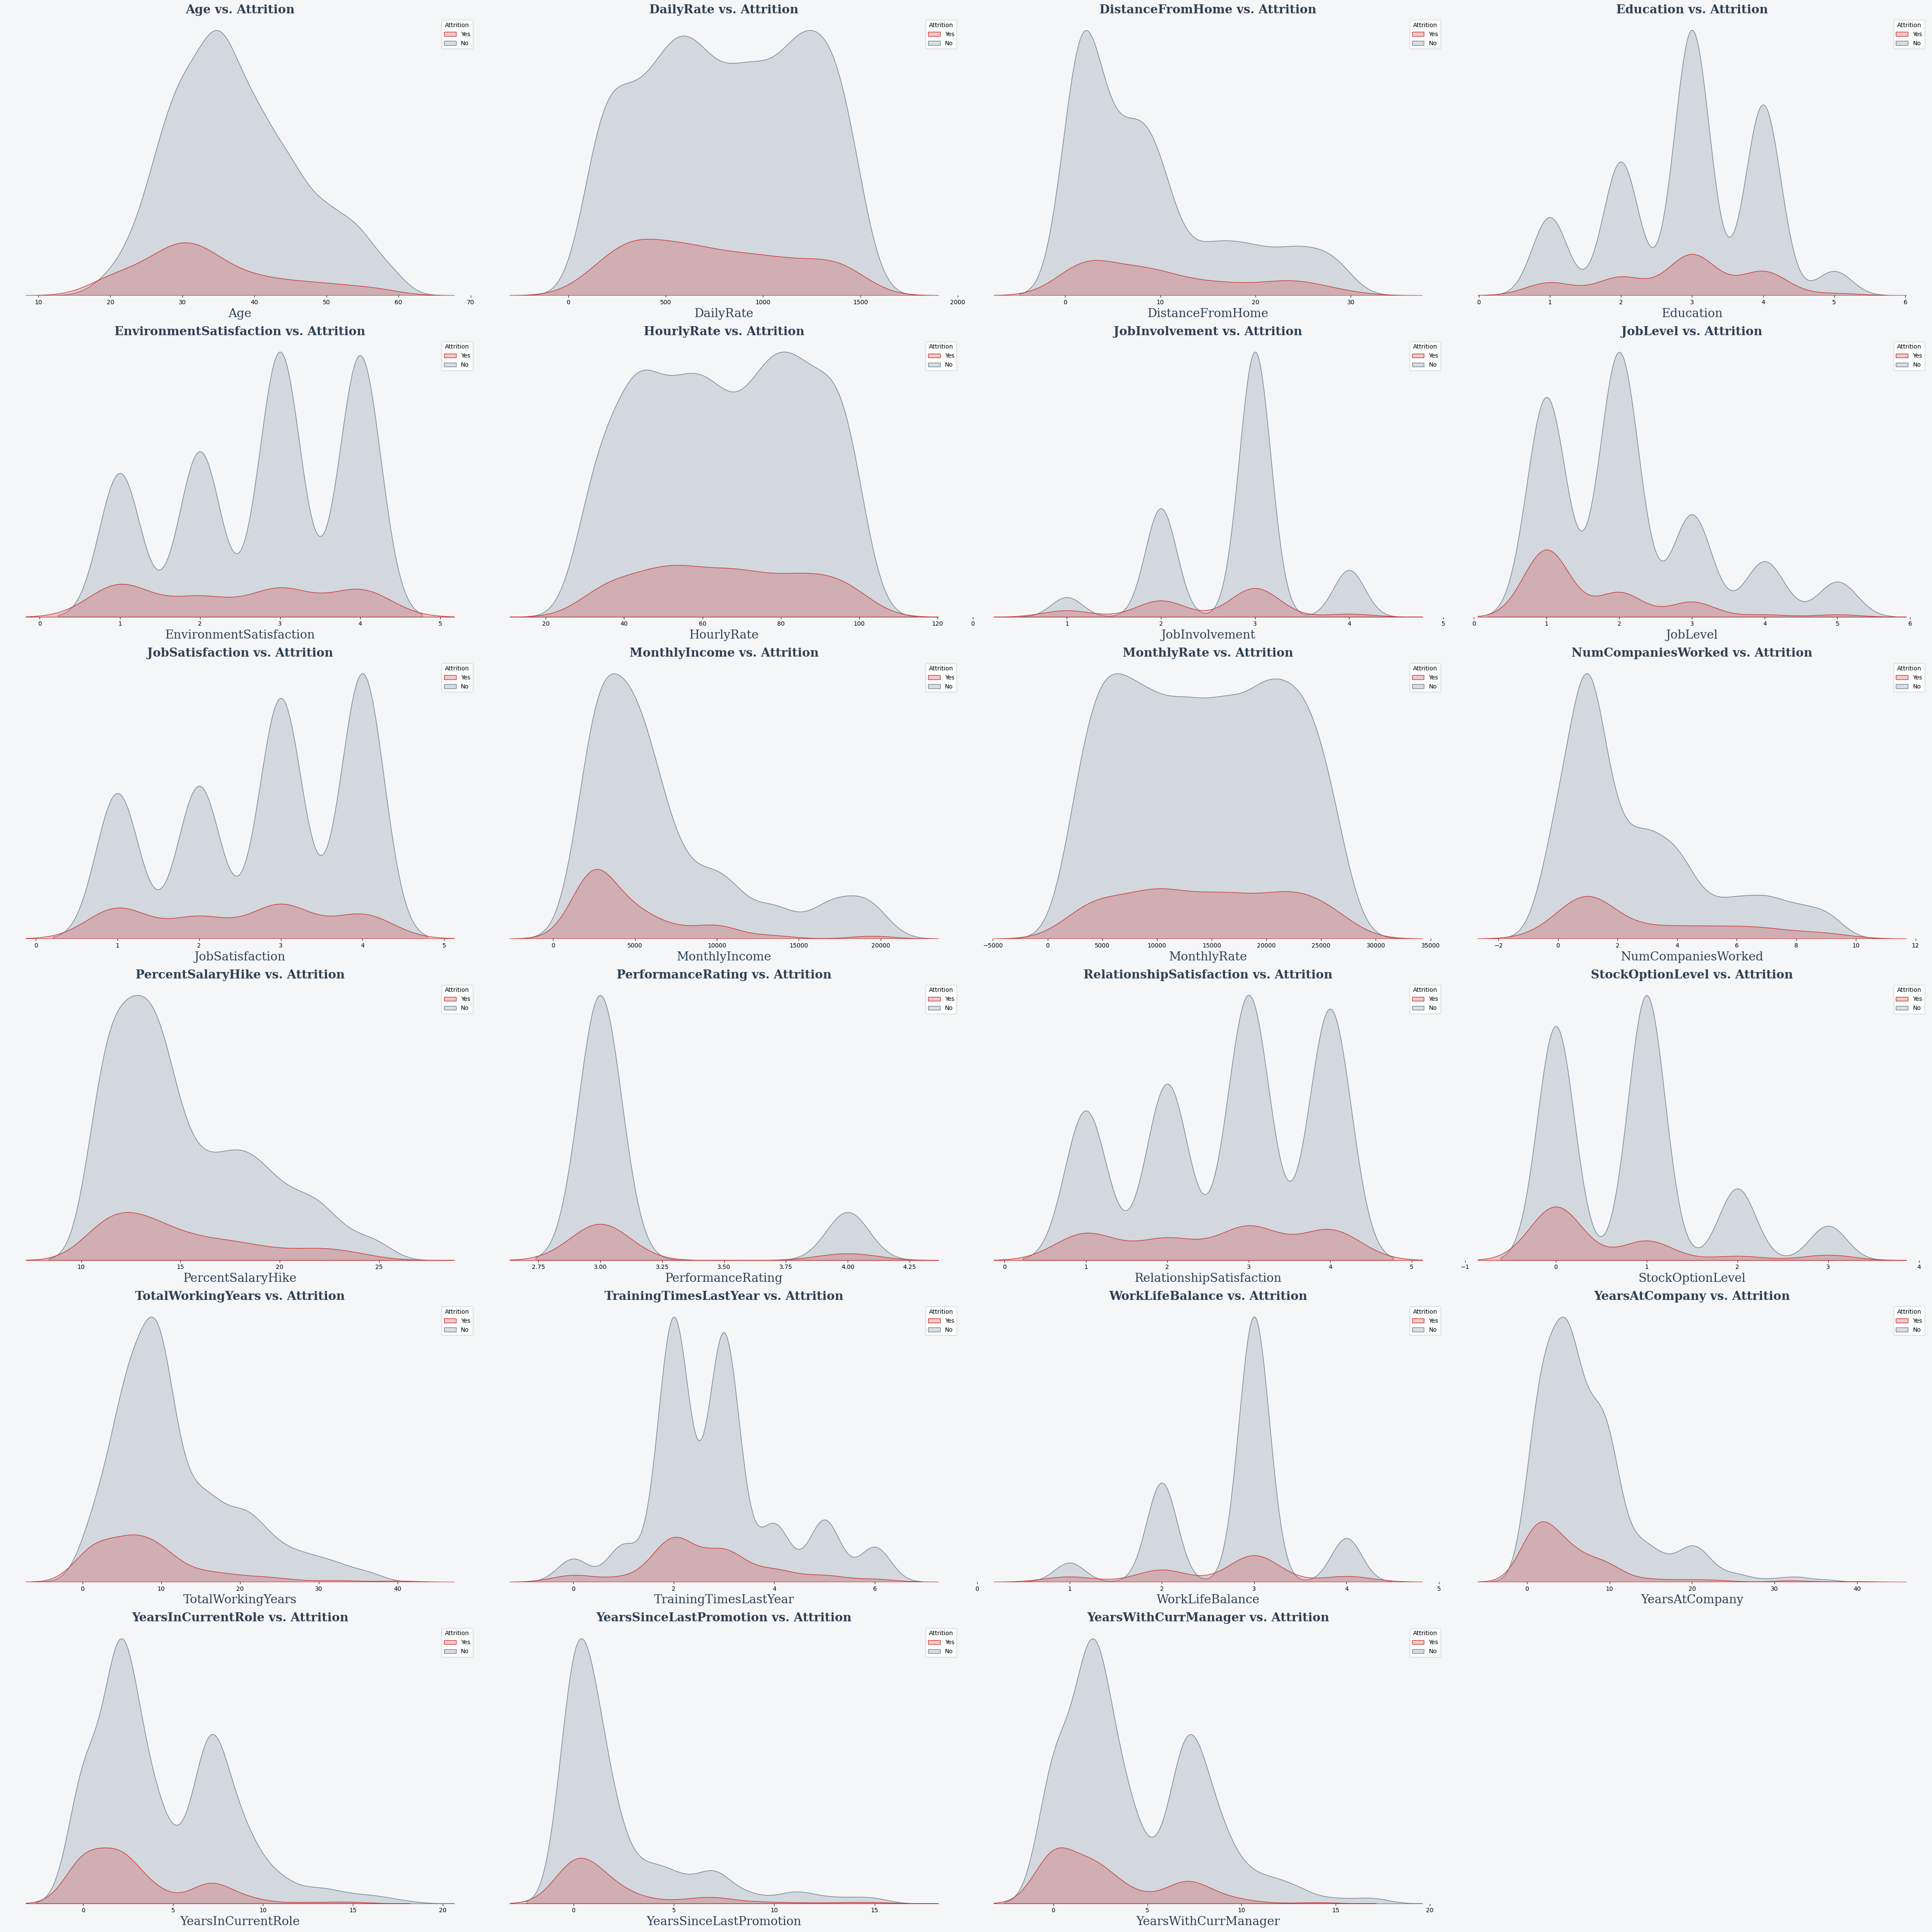

In [28]:
attrition_color = '#cb3335'
retention_color = '#708090'
background_color = '#F4F6F7'
text_color = '#2E4053'


num_columns = data.select_dtypes(include=['number']).columns
#24 columns

fig, axes = plt.subplots(6, 4, figsize=(45, 9 * 5))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.kdeplot(ax=axes[i], x=col, hue='Attrition', data=data, fill=True, palette=[attrition_color, retention_color])

    # Set title font
    axes[i].set_title(f'{col} vs. Attrition',
                      fontdict={'font':'Serif', 'color': text_color, 'size': 20, 'weight': 'bold'})

    # Set x and y label font
    axes[i].set_xlabel(col,
                       fontdict={'font':'Serif', 'color': text_color, 'size': 20, 'weight': 'normal'})
    
    axes[i].set_ylabel('Density',
                       fontdict={'font':'Serif', 'color': text_color, 'size': 20, 'weight': 'normal'})
    
    # Customize other plot elements
    axes[i].set_facecolor(background_color)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)
    axes[i].patch.set_facecolor(background_color)

for j in range(len(num_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
fig.patch.set_facecolor(background_color)
plt.show()

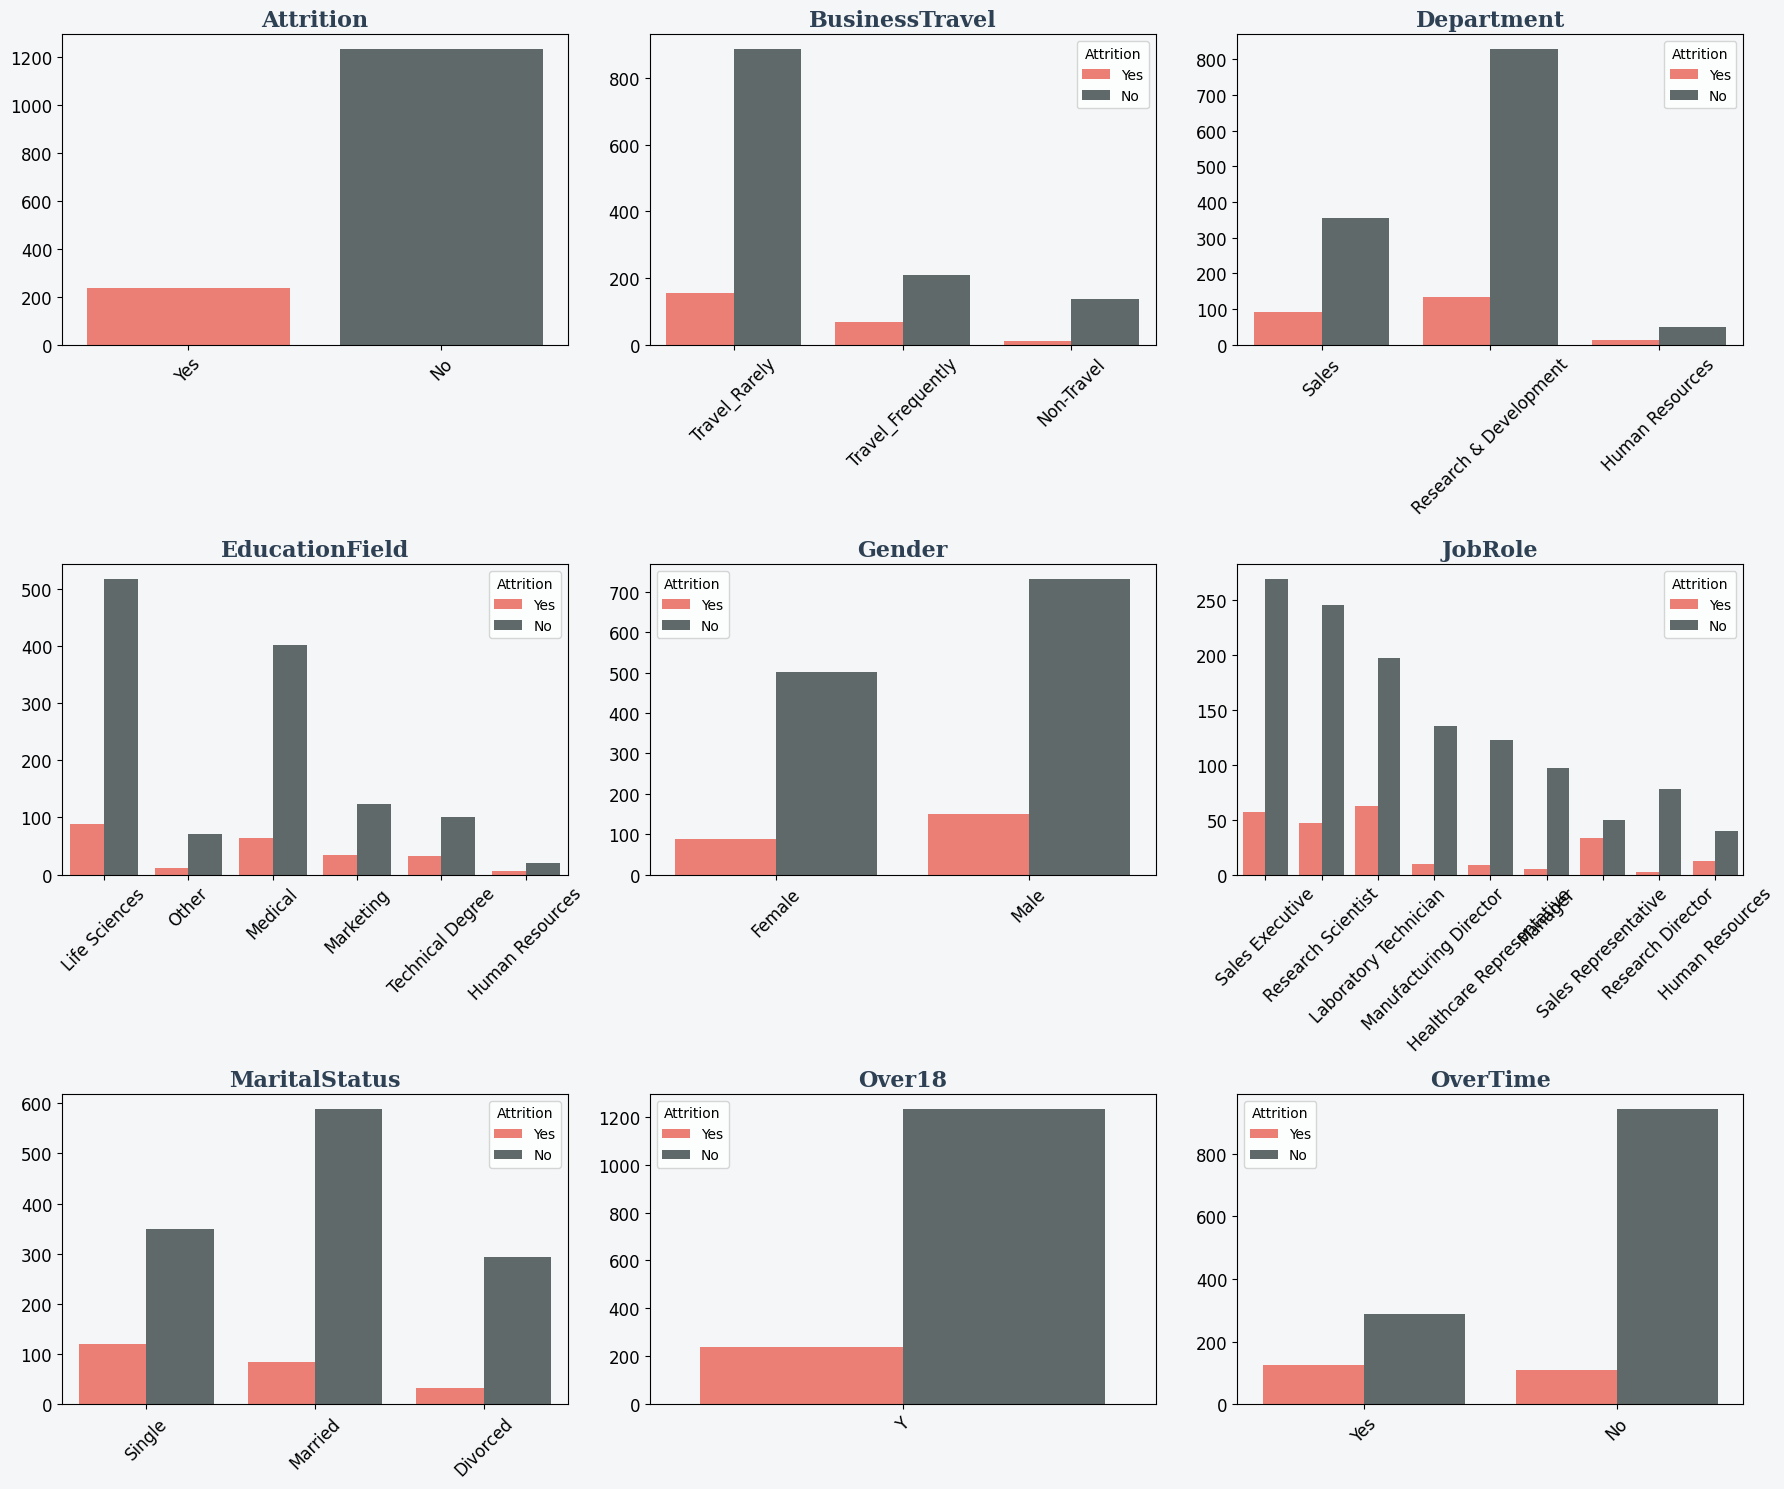

In [30]:
attrition_color = '#FF6F61'
retention_color = '#5F6A6A'
text_color = '#2E4053'
background_color = '#F4F6F7'

object_columns = data.select_dtypes(include=['object']).columns

# Define the number of rows and columns for the subplot grid
num_cols = len(object_columns)
cols = 3  # 3 columns
rows = (num_cols // cols) + (num_cols % cols > 0)  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

# Plot each object column
for i, col in enumerate(object_columns):
    sns.countplot(ax=axes[i], x=col, data=data, hue='Attrition', palette=[attrition_color, retention_color])
    axes[i].set_title(f'{col}', fontdict={'font': 'Serif', 'color': text_color, 'weight': 'bold', 'size': 16})
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    axes[i].set_facecolor(background_color)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.patch.set_facecolor(background_color)
plt.tight_layout()
plt.show()

In [35]:
intt = data.select_dtypes(exclude=['object'])
coll = data.select_dtypes(exclude=['object'])

In [36]:
intt['age_cat'] = pd.cut(intt['Age'], bins = [13,18, 45,60], labels = ['Teens', 'Adults','Mid Adults'])
data['TotalWorkingYearscat'] = pd.cut(data['TotalWorkingYears'], bins = [0,10,20, 30,40], labels = ['0-10', '10-20', '20-30','30-40'])
data['MonthlyIncomedcat'] = pd.cut(data['MonthlyIncome'], bins = [0,5000,10000, 15000,20000], labels = ['0-5000', '5000-10000', '10000-15000','15000-20000'])

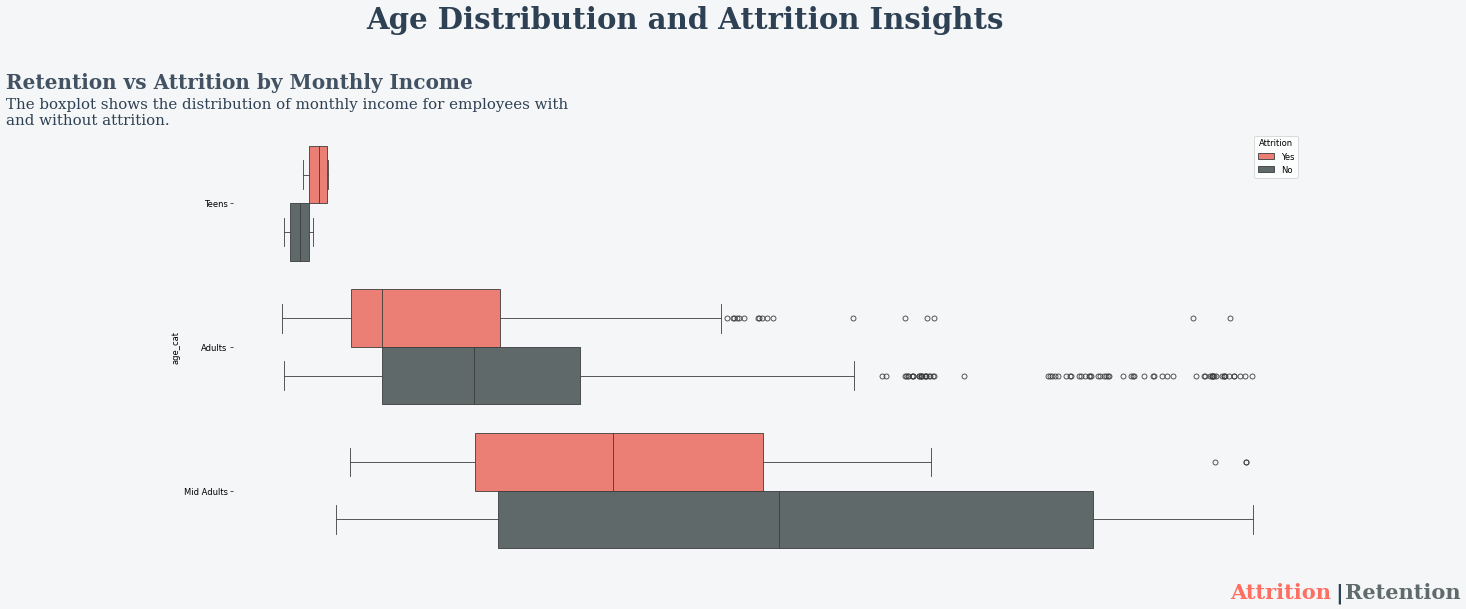

In [41]:
attrition_color = '#FF6F61'
retention_color = '#5F6A6A'
background_color = '#F4F6F7'
accent_color = '#1d2c8a'
text_color = '#2E4053'

fig = plt.figure(figsize=(24, 10), dpi=60)

gs = fig.add_gridspec(15, 24)
gs.update(wspace=1, hspace=0.05)

ax1 = fig.add_subplot(gs[1:15, 1:])  # Box Plot

# Axes list
axes = [ax1]

# Setting axes; turning off visibility of axes and spines
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(background_color)

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(background_color)

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)


# Boxplot with hue of attrition
sns.boxplot(x=intt['MonthlyIncome'], y=intt['age_cat'], data=data, hue=data['Attrition'], ax=ax1, palette=[attrition_color, retention_color])

# Text Annotations using fig.text
fig.text(0.25, 1, 'Age Distribution and Attrition Insights', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size':35})




fig.text(0, 0.9, 'Retention vs Attrition by Monthly Income', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0, 0.84, 'The boxplot shows the distribution of monthly income for employees with \nand without attrition.',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.85, 0.05, 'Attrition', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': attrition_color})
fig.text(0.923, 0.05, '|', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': text_color})
fig.text(0.93, 0.05, 'Retention', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': retention_color})

fig.show()

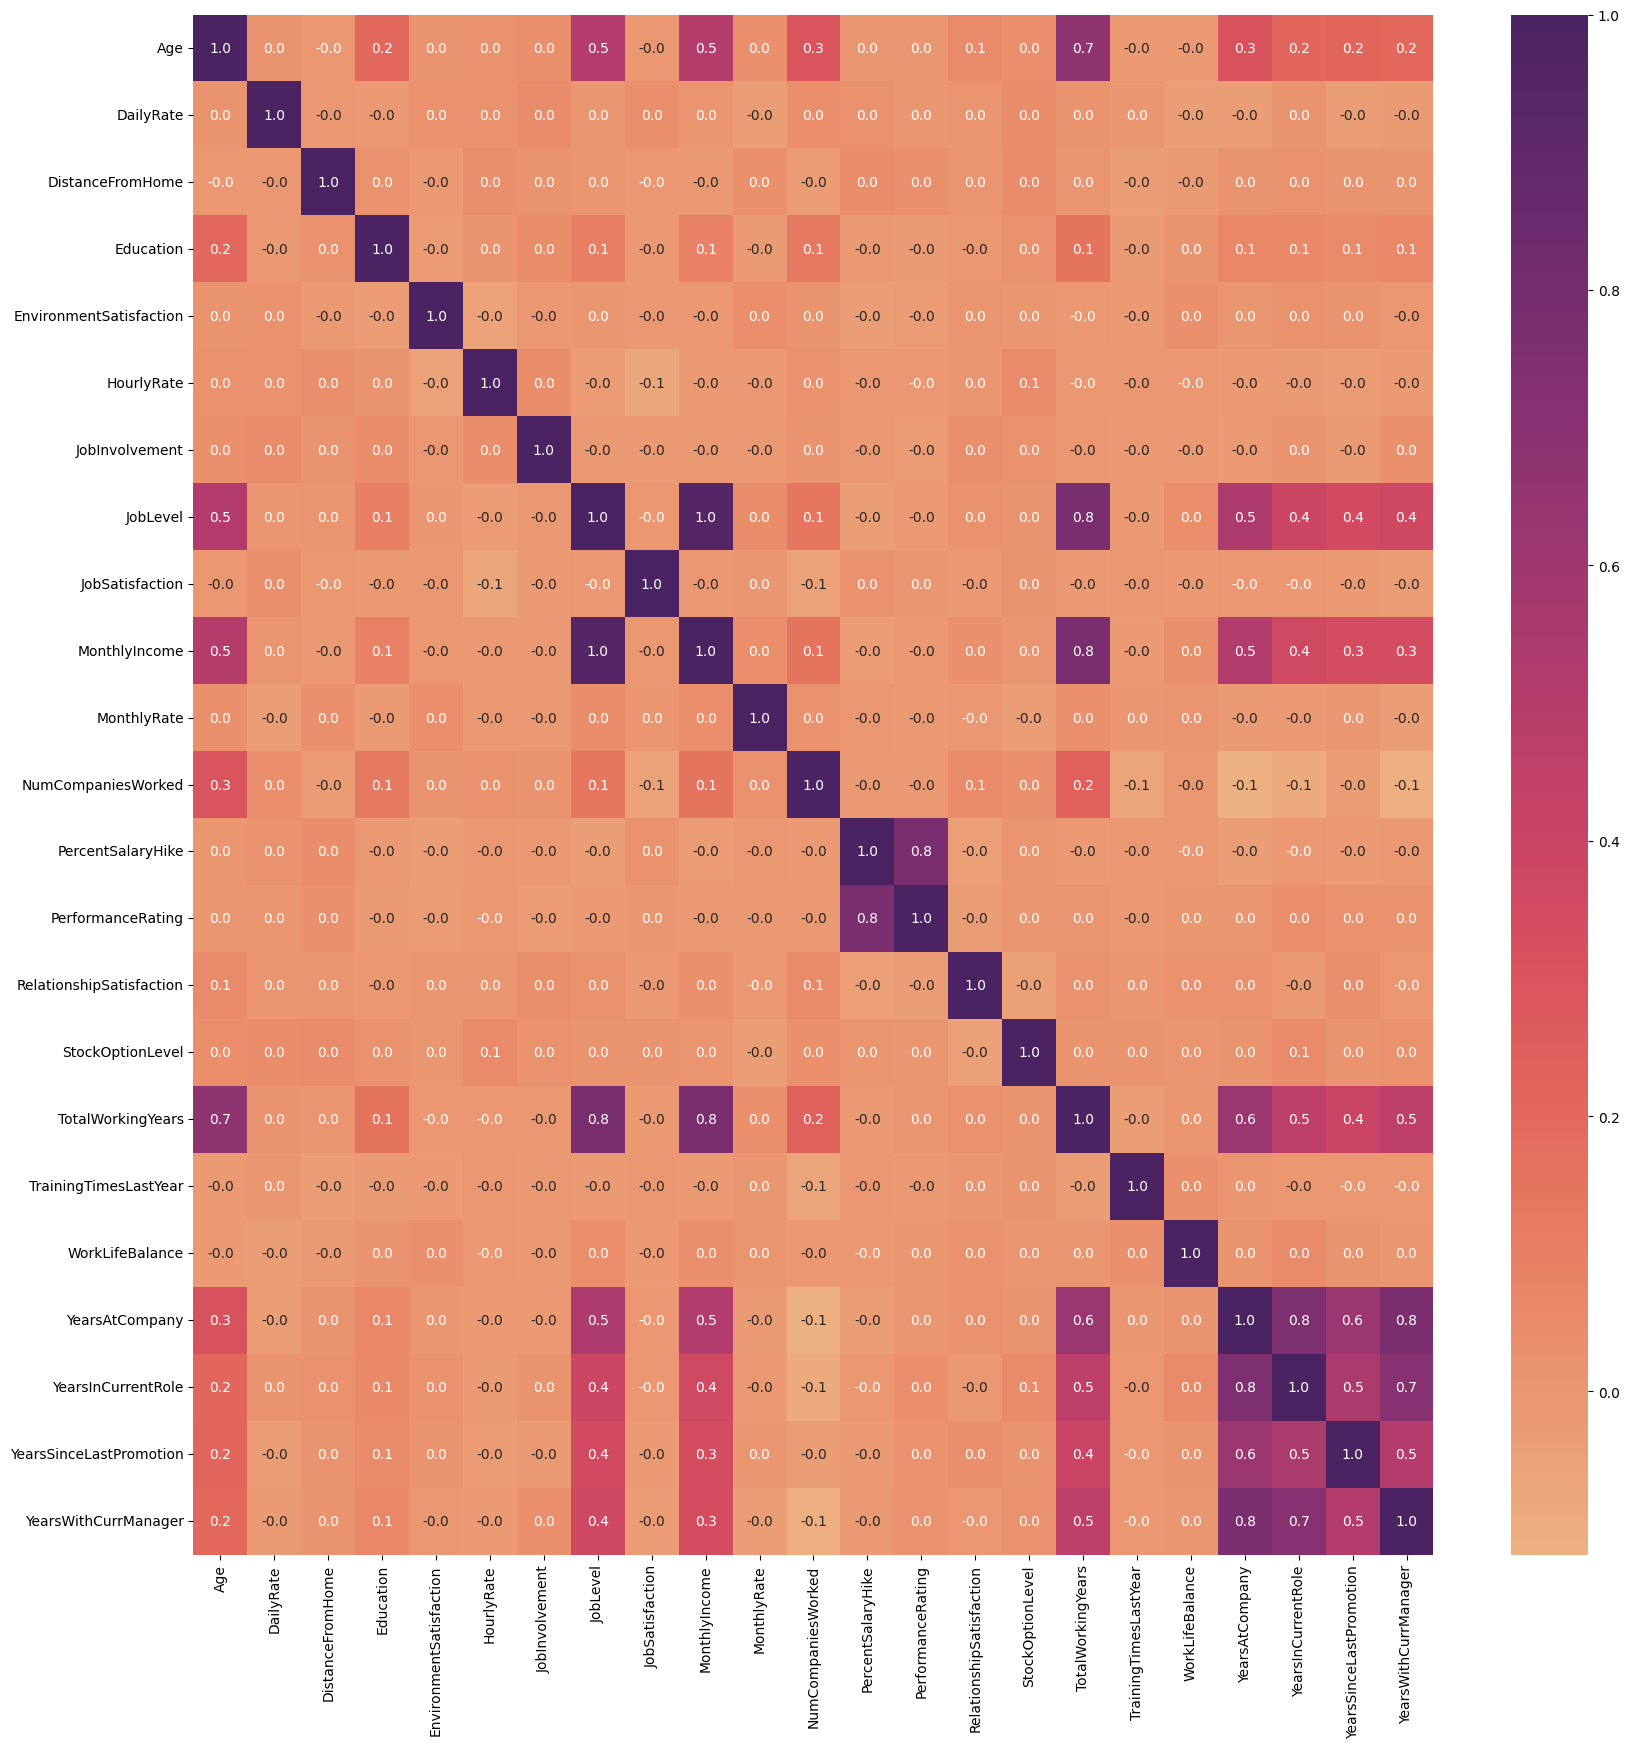

In [ ]:
numeric_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]

plt.figure(figsize=(20, 20))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt='.1f')
plt.show()